# Adding GR
Let's start with our Newtonian flux equation.
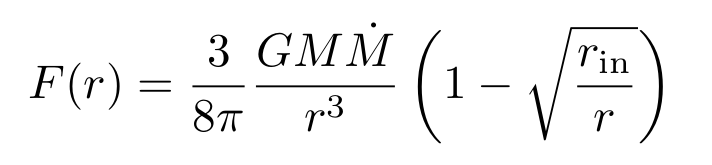
We already have a function that can calculate this version of the equation.

In [24]:
import astropy.constants as c
import astropy.units as u
import numpy as np

def F(r, M, Mdot, r_in):
    flux = 3. * c.G * M * Mdot / (8. * np.pi * r**3) * (1. - np.sqrt(r_in / r))    # Calculate the flux
    flux[flux<0.] = 0.
    return flux.to(u.Unit("erg/(cm2 s)"))

Now, we want to replace it with this equation:
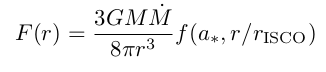
The only difference is that the (1-sqrt(r_in / r)) term has been replaced with this function *f*, which describes the radial dependence due to the effects of general relativity. The code provided by my advisor can do this calculation for us and give us values for *f* if we plug in a radius and a black hole spin, which is just another parameter we can set. Here's how we use it:

In [51]:
from plot_disk import grcor
import matplotlib.pyplot as plt

def gr(m):
    grav_radius = ((c.G * m) / (c.c**2))
    return grav_radius.to(u.cm)

def f_function(a, r, M):
    qcor, tcor = grcor(a, r/gr(M))
    return tcor**4

Now we should be able to plot this f function and see what its behavior is like compared with the Newtonian piece we had before. Let's do that.

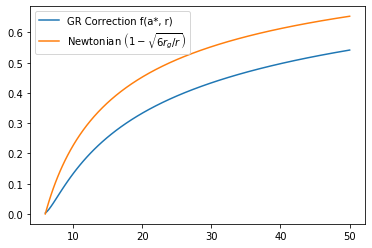

In [69]:
# Choose values for the mass and black hole spin, "a_bh"
a_bh = 0.1 # Black hole spin is unitless
mass = 6.62*u.solMass

# Generate some radii in log space (this makes sure the data points are closer together closer to the black hole)
r = np.logspace(np.log10(6*gr(mass).value), np.log10(50*gr(mass).value))*u.cm

# Calculate the values of the f function at the radii we've picked.
f_values = f_function(a_bh, r, mass)

# Calculate the equivalent piece of the Newtonian equation
Newtonian_values = 1 - np.sqrt(6*gr(mass) / r)

# Plot the two functions
plt.plot(r/gr(mass), f_values, label='GR Correction f(a*, r)')
plt.plot(r/gr(mass), Newtonian_values, label=r'Newtonian $\left(1-\sqrt{6r_g/r}\right)$')
plt.legend()
plt.show()

Great! Now, your task is to use this `f_function` to get the actual **flux** from this GR calculation. Remember, the only difference between the GR flux function and the Newtonian flux function (which you've already written) should be the term in parentheses with the 1-sqrt(r_in/r). This needs to be replaced with our `f_function` to get the GR flux as a function of radius.

I've done the first step for you below: we've defined a new function ``

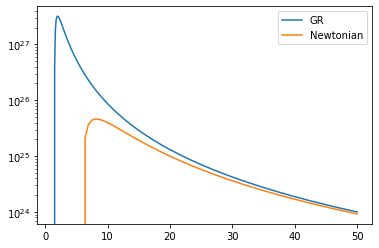

In [49]:
from plot_disk import grcor
import matplotlib.pyplot as plt

def gr(m):
    grav_radius = ((c.G * m) / (c.c**2))
    return grav_radius.to(u.cm)

def F_gr(r, M, Mdot):
    flux = 0 # !!!! This is what needs to be changed! What should you put in here?
    return flux.to(u.Unit("erg/(cm2 s)"))

# Set the mass equal to what we used in the simulation
mass = 6.62*u.solMass

# We've measured the approximate accretion rate of this system using the fit of the temperature, so let's plug it in!
accr_rate = 0.000025*u.solMass/u.yr

# Create an array of r points. I've done this in log space so the plot looks better.
# This is from 1.2 gravitational radii to 50 gravitational radii.
r = np.logspace(np.log10(1.2*gr(mass).value), np.log10(50*gr(mass).value))*u.cm

# plot both lines
plt.plot(r/gr(mass), F_gr(r, mass, accr_rate), label='GR')
plt.plot(r/gr(mass), F(r, mass, accr_rate, 6*gr(mass)), label='Newtonian')
plt.yscale('log')
plt.legend()
plt.show()